### Z검정과 T검정

In [5]:
# 필요한 패키지 설치

from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

In [6]:
# 데이터 불러오기
df = pd.read_csv("C:/Users/qorud/OneDrive/바탕 화면/Github/Data Analysis Method/Golf_test.csv")

# 데이터 샘플 확인
df.head()

#각 타입의 골프공은 특정 처리를 하기 전과 후로 구분되고 있다.
#예를 들어 타입 A 골프공은 특정 처리를 하기 전인 TypeA_before와 TypeA_After로 나눠진다.

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [7]:
# 골프공 타입 별 통계값 확인

df.describe()

#각 칼럼의 통곗값을 확인한다.
#모두 50개의 관측치가 있기 때문에 Z-test와 T-test가 모두 가능하다.
#가장 눈여겨봐야할 평균값은 270 내외의 값을 가지고 있고, before보다 after가 큰 경향이 있다.
#그리고 type A->C->B 순으로 평균 값이 크다. 이제 이 차이가 통계적으로 유의미한 차이인지 확인한다.

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


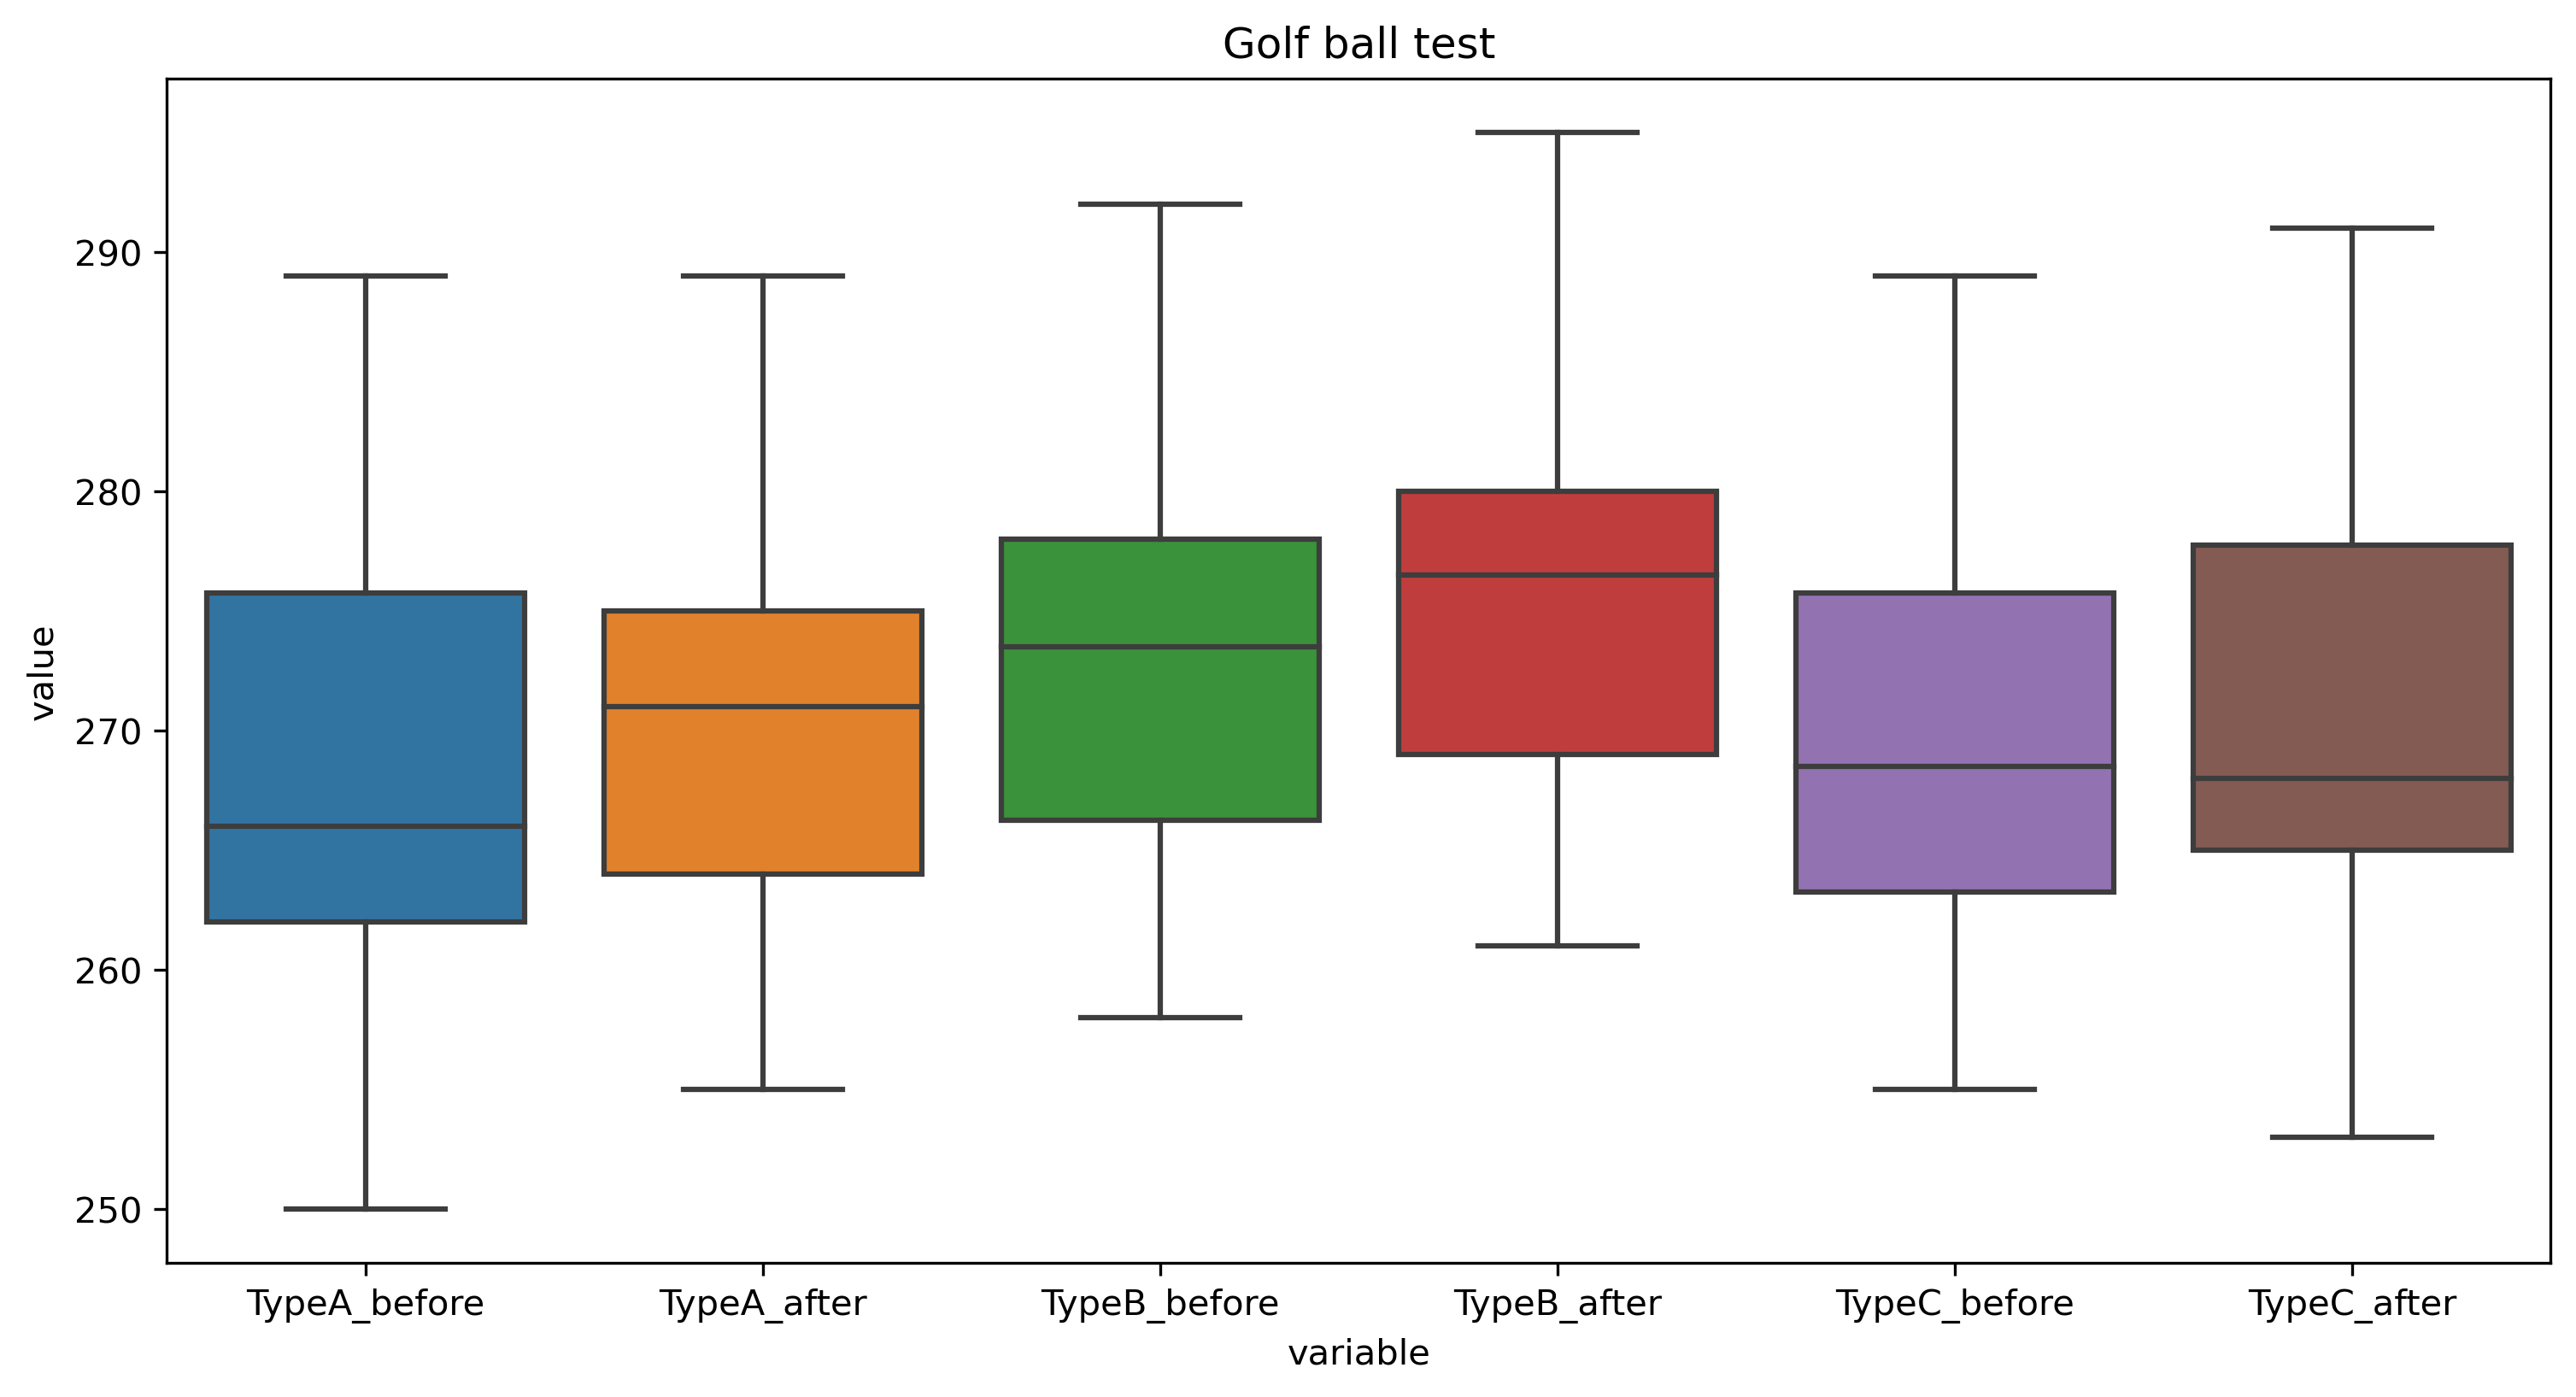

In [15]:
# 그룹 별 박스 플롯 시각화

df2 =  pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

#칼럼별 차이를 직관적으로 확인하기 위해 박스 플롯 시각화를 수행했다.
#각 그룹의 분포와 중앙값을 한눈에 확인 가능하다.
# TypeA_before과 TypeA_after은 중앙값은 차이가 나지만 분포는 유사한 것을 알 수 있다.

In [9]:
# 데이터 정규성 검정

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

#Z-test와 T-test를 하기 전 정규성 검정을 해준다.
#Shapiro-wilk 테스트를 수행했고 TypeC_after를 제외하고 모두 0.05를 초과하기 떄문에 정규성을 가지지 않는다는 귀무가설을 기각한다.
#따라서 정규성을 만족한다고 볼 수 있다.
#본래 TypeC_after같은 경우는 정규성을 갖도록 가공을 해줘야 하지만 이번엔 생략한다.

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


In [16]:
# 데이터 등분산성 검정
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

#다음으로는 등분산성 검정을 수행했다.
#모두 p-value가 0.05이상이므로 등분산이라는 귀무가설을 채택한다.

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

In [11]:
# Z-test (TypeA_Before와 TypeA_After)
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided')

#양측검정을 하였고 p-value가 0.218로 평균 차이가 유의미하지 않을으로 나타났다.
#즉, TypeA골프공은 처리 전 후의 비거리가 통계적으로 차이가 없다고 할 수 있다.

(-1.2313987682249838, 0.21817375744980994)

In [12]:
# Z-test (TypeA_Before와 TypeB_before)

# 양측검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))

(-2.789495974658115, 0.005279015267745852)
(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


In [13]:
# 대응표본 t검정 수행
scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])

Ttest_relResult(statistic=-1.221439914972903, pvalue=0.22776376448687602)

In [14]:
# 독립표본 t검정 수행
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

Ttest_indResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285)